In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.cluster import k_means
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [24]:
mall_df = pd.read_csv('Mall_Customers.csv')

In [25]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:xlabel='Genre', ylabel='Age'>

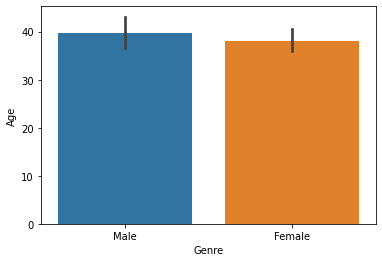

In [27]:
sns.barplot(x='Genre',y='Age',data=mall_df)

<AxesSubplot:xlabel='Genre', ylabel='count'>

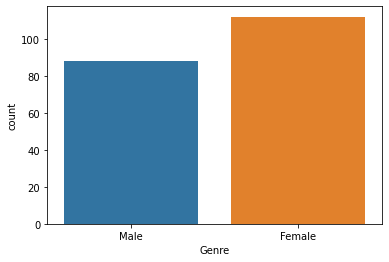

In [28]:
sns.countplot(x='Genre',data=mall_df)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

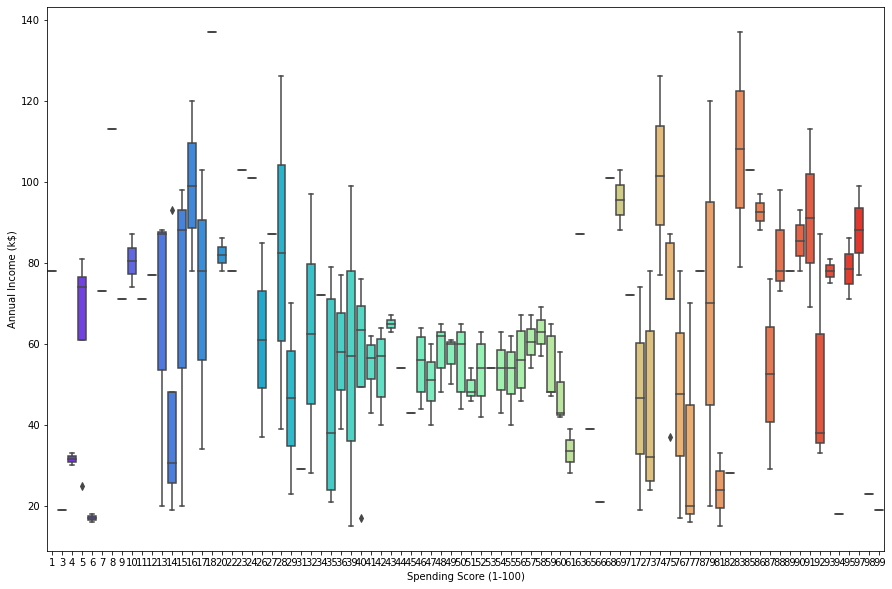

In [29]:
plt.figure(figsize=(15,10))

sns.boxplot(x="Spending Score (1-100)", y="Annual Income (k$)", data=mall_df,palette='rainbow')

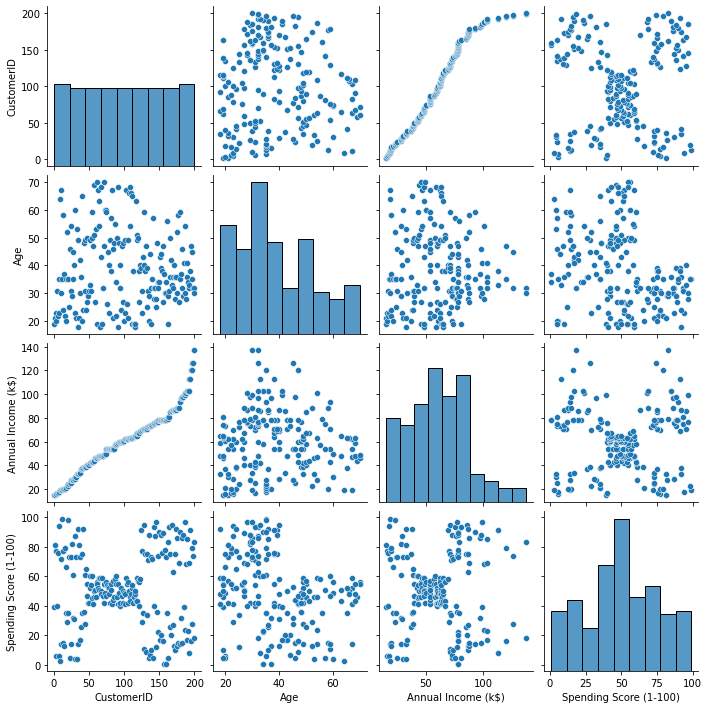

In [30]:
sns.pairplot(mall_df)

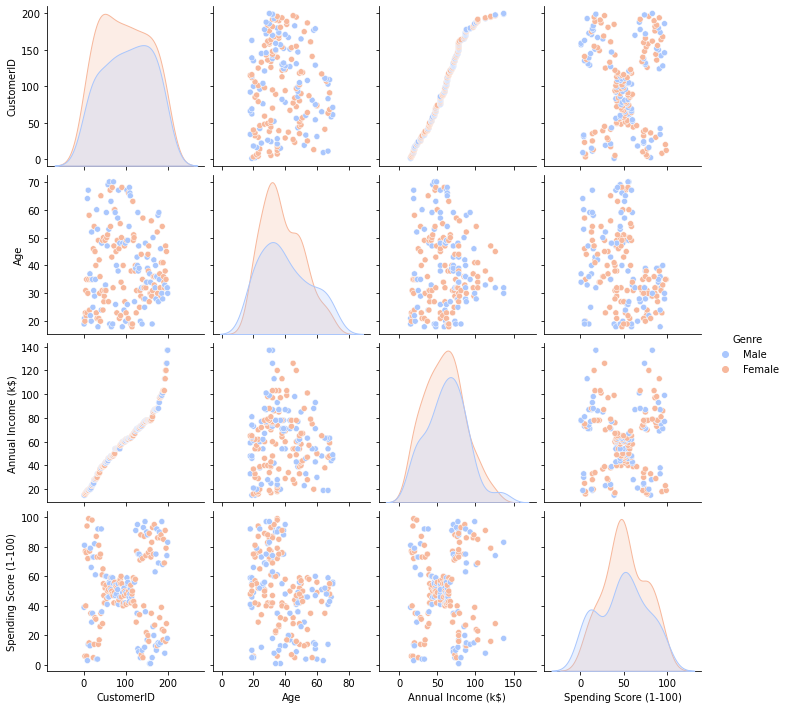

In [56]:
sns.pairplot(mall_df,hue='Genre',palette='coolwarm')

Text(0.5, 1.0, 'K-means')

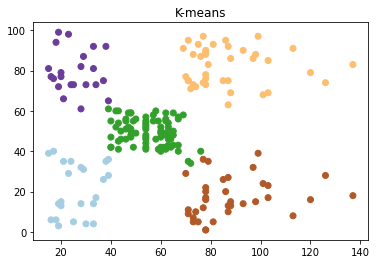

In [37]:
X = mall_df.iloc[:, [3, 4]].values

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("K-means")


Text(0.5, 1.0, 'Hierarchical')

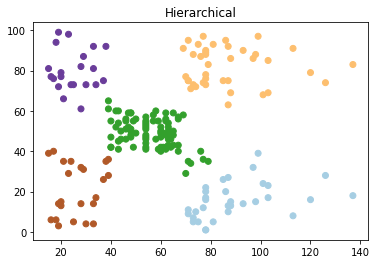

In [38]:
hier = AgglomerativeClustering(n_clusters=5)
y_pred2 = hier.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='Paired')
plt.title("Hierarchical")

Text(0.5, 1.0, 'DBSCAN')

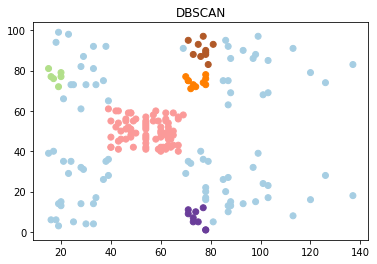

In [39]:
db = DBSCAN(eps=5, min_samples=5)
db.fit(X)
y_pred3 = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred3, cmap='Paired')
plt.title("DBSCAN")

In [49]:
X = mall_df[['Genre','Annual Income (k$)','Age','Spending Score (1-100)']].values
Y = mall_df["Spending Score (1-100)"].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Male'

In [52]:
Y_pred = regressor.predict(X_test)
Y_pred

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(Y_pred,Y_test))
print("MAE:",metrics.mean_absolute_error(Y_pred,Y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_pred,Y_test)))
print("r2_score:",metrics.r2_score(Y_pred,Y_test))